In [2]:
import pandas as pd
data = pd.read_csv('/Users/himanshuaggarwal/ironhack/himanshu/data/vehicles/vehicles.csv')

In [3]:
year = 2016
filtered = data[data['Year']==year]

In [4]:
grouped = filtered.groupby('Make').agg({'Combined MPG':'mean'}).reset_index()
results = grouped.sort_values('Combined MPG', ascending=False).head(10)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Top 10 Manufacturers by Fuel Efficiency 2016\n')

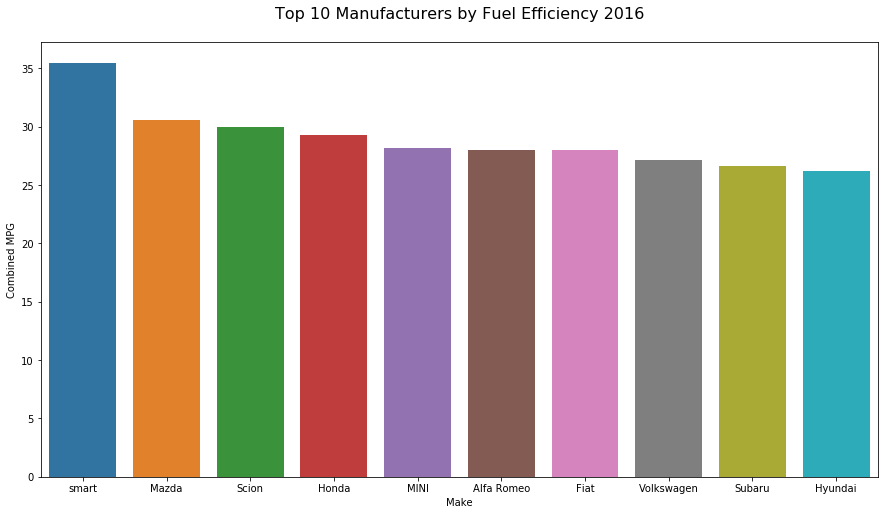

In [6]:
title = 'Top 10 Manufacturers by Fuel Efficiency ' + str(year)

fig, ax = plt.subplots(figsize=(15,8))
barchart = sns.barplot(data=results, x='Make', y='Combined MPG')
plt.title(title + "\n", fontsize=16)

In [7]:
fig = barchart.get_figure()
fig.savefig(title + '.png')

Enter the year: 2016


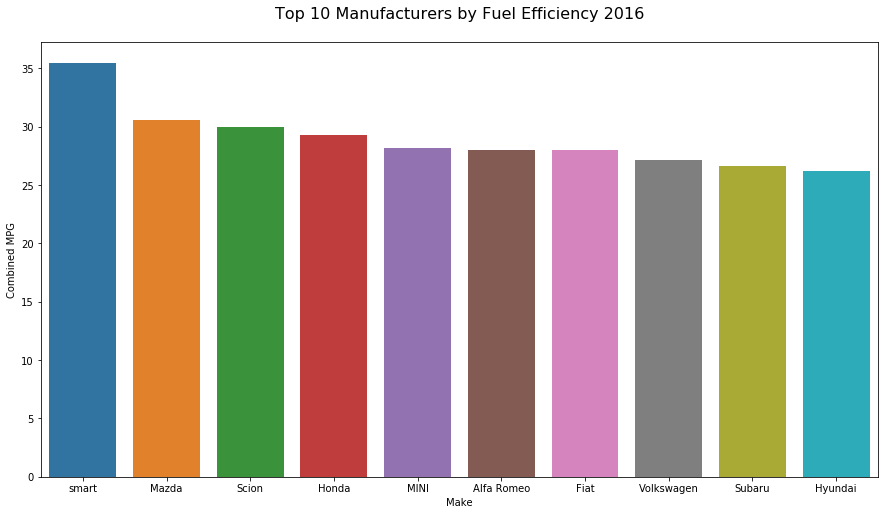

In [11]:
import pandas as pd

year = int(input('Enter the year: '))
title = 'Top 10 Manufacturers by Fuel Efficiency ' + str(year)

def acquire():
    data = pd.read_csv('/Users/himanshuaggarwal/ironhack/himanshu/data/vehicles/vehicles.csv')
    return data

def wrangle(df):
    filtered = data[data['Year']==year]
    return filtered

def analyze(df):
    grouped = filtered.groupby('Make').agg({'Combined MPG':'mean'}).reset_index()
    results = grouped.sort_values('Combined MPG', ascending=False).head(10)
    return results

def visualize(df):
    fig, ax = plt.subplots(figsize=(15,8))
    barchart = sns.barplot(data=results, x='Make', y='Combined MPG')
    plt.title(title + "\n", fontsize=16)
    return barchart

def save_viz(barchart):
    fig = barchart.get_figure()
    fig.savefig(title + '.png')

if __name__ == '__main__':
    data = acquire()
    filtered = wrangle(data)
    results = analyze(filtered)
    barchart = visualize(results)
    save_viz(barchart)

In [12]:
import datapipelines-example

SyntaxError: invalid syntax (<ipython-input-12-a60618a946f3>, line 1)

In [85]:
from bs4 import BeautifulSoup
import requests

In [86]:
html = requests.get('https://en.wikipedia.org/wiki/List_of_mountains_by_elevation')
content = html.content

In [87]:
soup = BeautifulSoup(content,"html.parser")

In [88]:
table = soup.find_all('table', attrs = {'class':'wikitable sortable'})

In [89]:
tableInfo = table[0].find_all('td')
cols = ['mountain','meter','feet','range','location']
data = pd.DataFrame(columns=cols)

In [90]:
i = 0
temp = []
for item in tableInfo:
    if item.text != '':
        temp.append(item.text)
        if len(temp)==5:
            data.loc[len(data), :] = temp
            temp=[]
data

,mountain,meter,feet,range,location
0,Mount Everest,"8,848","29,029",Himalayas,Nepal/China\n
1,K2,"8,611","28,251",Karakoram,Pakistan/China\n
2,Kangchenjunga,"8,586","28,169",Himalayas,Nepal/India – Highest in India\n
3,Lhotse,"8,516","27,940",Himalayas,Nepal/China – Climbers ascend Lhotse Face in c...
4,Makalu,"8,485","27,838",Himalayas,Nepal/China\n
5,Cho Oyu,"8,201","26,906",Himalayas,"Nepal/China – Considered ""easiest"" eight-thous..."
6,Dhaulagiri,"8,167","26,795",Himalayas,Nepal – Presumed world's highest from 1808-1838\n
7,Manaslu,"8,163","26,781",Himalayas,Nepal\n
8,Nanga Parbat,"8,126","26,660",Himalayas,Pakistan\n
9,Annapurna,"8,091","26,545",Himalayas,Nepal – First eight-thousander to be climbed (...


In [91]:
data['location']

0                                         Nepal/China\n
1                                      Pakistan/China\n
2                      Nepal/India – Highest in India\n
3     Nepal/China – Climbers ascend Lhotse Face in c...
4                                         Nepal/China\n
5     Nepal/China – Considered "easiest" eight-thous...
6     Nepal – Presumed world's highest from 1808-1838\n
7                                               Nepal\n
8                                            Pakistan\n
9     Nepal – First eight-thousander to be climbed (...
10               Pakistan/China – Originally named K5\n
11               Pakistan/China – Originally named K3\n
12               Pakistan/China – Originally named K4\n
13                                              China\n
Name: location, dtype: object